In [1]:
import pandas as pd
data = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [3]:
# Fill missing values with appropriate methods
data['trestbps'] = data['trestbps'].fillna(data['trestbps'].mean())
data['chol'] = data['chol'].fillna(data['chol'].median())
data['restecg'] = data['restecg'].fillna(data['restecg'].mode()[0])
data['fbs'] = data['fbs'].fillna(data['fbs'].mode()[0]).astype(int, copy=False)  # Avoid downcasting warning
data['thalch'] = data['thalch'].fillna(data['thalch'].median())
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

data['slope'] = data['slope'].fillna(data['slope'].mode()[0])
data['ca'] = data['ca'].fillna(data['ca'].mode()[0])
data['thal'] = data['thal'].fillna(data['thal'].mode()[0])
data['exang'] = data['exang'].fillna(data['exang'].mode()[0]).astype(int, copy=False)  # Avoid downcasting warning


/tmp/ipykernel_17/3267025356.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fbs'] = data['fbs'].fillna(data['fbs'].mode()[0]).astype(int, copy=False)  # Avoid downcasting warning
/tmp/ipykernel_17/3267025356.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang'] = data['exang'].fillna(data['exang'].mode()[0]).astype(int, copy=False)  # Avoid downcasting warning


In [4]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'sex', 'dataset', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal'
]

# Apply LabelEncoder to each column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])



# Display the updated DataFrame
print(data.head())

   id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope  ca  thal  num  
0      2.3      0   0     0    0  
1      1.5      1   3     1    2  
2      2.6      1   2     2    1  
3      3.5      0   0     1    0  
4      1.4      2   0     1    0  


In [6]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
column_to_scale = ['age','trestbps','chol','thalch','oldpeak']
data[column_to_scale] = standardScaler.fit_transform(data[column_to_scale])
print(data.head())

   id       age  sex  dataset  cp  trestbps      chol  fbs  restecg    thalch  \
0   1  1.007386    1        0   3  0.698041  0.303643    1        0  0.489727   
1   2  1.432034    1        0   0  1.511761  0.789967    0        0 -1.181478   
2   3  1.432034    1        0   0 -0.658158  0.266939    0        0 -0.345875   
3   4 -1.752828    1        0   2 -0.115679  0.459634    0        1  1.961979   
4   5 -1.328180    0        0   1 -0.115679  0.037541    0        0  1.365120   

   exang   oldpeak  slope  ca  thal  num  
0      0  1.368109      0   0     0    0  
1      1  0.611589      1   3     1    2  
2      1  1.651804      1   2     2    1  
3      0  2.502889      0   0     1    0  
4      0  0.517024      2   0     1    0  


In [7]:
data.drop(columns=["id", "dataset"], inplace=True)
print(data.head())

        age  sex  cp  trestbps      chol  fbs  restecg    thalch  exang  \
0  1.007386    1   3  0.698041  0.303643    1        0  0.489727      0   
1  1.432034    1   0  1.511761  0.789967    0        0 -1.181478      1   
2  1.432034    1   0 -0.658158  0.266939    0        0 -0.345875      1   
3 -1.752828    1   2 -0.115679  0.459634    0        1  1.961979      0   
4 -1.328180    0   1 -0.115679  0.037541    0        0  1.365120      0   

    oldpeak  slope  ca  thal  num  
0  1.368109      0   0     0    0  
1  0.611589      1   3     1    2  
2  1.651804      1   2     2    1  
3  2.502889      0   0     1    0  
4  0.517024      2   0     1    0  


In [8]:
# Convert 'num' column to binary: 0 = No Heart Disease, 1 = Heart Disease
data['num'] = data['num'].apply(lambda x: 0 if x == 0 else 1)

print(data['num'].value_counts())

num
1    509
0    411
Name: count, dtype: int64


In [9]:
x=data.drop(columns=['num'])
y=data['num']

In [10]:
print(x.head())

        age  sex  cp  trestbps      chol  fbs  restecg    thalch  exang  \
0  1.007386    1   3  0.698041  0.303643    1        0  0.489727      0   
1  1.432034    1   0  1.511761  0.789967    0        0 -1.181478      1   
2  1.432034    1   0 -0.658158  0.266939    0        0 -0.345875      1   
3 -1.752828    1   2 -0.115679  0.459634    0        1  1.961979      0   
4 -1.328180    0   1 -0.115679  0.037541    0        0  1.365120      0   

    oldpeak  slope  ca  thal  
0  1.368109      0   0     0  
1  0.611589      1   3     1  
2  1.651804      1   2     2  
3  2.502889      0   0     1  
4  0.517024      2   0     1  


In [11]:
print(y.head(100))

0     0
1     1
2     1
3     0
4     0
     ..
95    1
96    1
97    1
98    0
99    0
Name: num, Length: 100, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
counts=y_train.value_counts()
print(counts)

num
1    400
0    336
Name: count, dtype: int64


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
pred_1=decision_tree.predict(x_test)
Accuracy1 = decision_tree.score(x_test, y_test)
print("Accuracy1: ",Accuracy1)
report=classification_report(y_test, pred_1)
print("Classification Report :",report)

Accuracy1:  0.842391304347826
Classification Report :               precision    recall  f1-score   support

           0       0.84      0.76      0.80        75
           1       0.84      0.90      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [16]:
from sklearn.metrics import (confusion_matrix, f1_score,accuracy_score, recall_score,
                            precision_score, mean_absolute_error, mean_squared_error)

confusion_m= confusion_matrix(y_test, pred_1)
print(f"confusion metrix :\n{confusion_m}")
accuracy=accuracy_score(y_test, pred_1)
f1=f1_score(y_test, pred_1)
precision=precision_score(y_test, pred_1)
racall=recall_score(y_test, pred_1)
meanae=mean_absolute_error(y_test, pred_1)
meanse=mean_squared_error(y_test, pred_1)

print(f"accuracy :{accuracy}")
print(f"F1_score :{f1}")
print(f"precision :{precision}")
print(f"racall :{racall}")
print(f"mean_absolute_error :{meanae}")
print(f"mean_squared_error :{meanse}")

confusion metrix :
[[57 18]
 [11 98]]
accuracy :0.842391304347826
F1_score :0.8711111111111111
precision :0.8448275862068966
racall :0.8990825688073395
mean_absolute_error :0.15760869565217392
mean_squared_error :0.15760869565217392


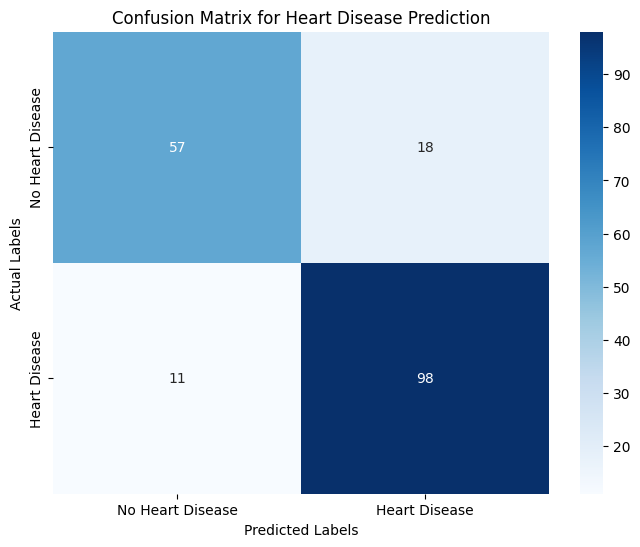

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace `confusion_m` with your confusion matrix variable
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["No Heart Disease", "Heart Disease"], 
            yticklabels=["No Heart Disease", "Heart Disease"])

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Heart Disease Prediction")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=200, random_state=42)
random_forest.fit(x_train, y_train)
pred_2=random_forest.predict(x_test)

Accuracy2 = random_forest.score(x_test, y_test)
print("Accuracy2: ",Accuracy2)
accuracy=accuracy_score(y_test, pred_2)
report=classification_report(y_test, pred_2)

confusion_m= confusion_matrix(y_test, pred_2)
print(f"confusion metrix :\n{confusion_m}")

print("Accuracy :",accuracy)
print("Classification Report :",report)

Accuracy2:  0.8532608695652174
confusion metrix :
[[65 10]
 [17 92]]
Accuracy : 0.8532608695652174
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.87      0.83        75
           1       0.90      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [19]:
f1=f1_score(y_test, pred_2)
precision=precision_score(y_test, pred_2)
racall=recall_score(y_test, pred_2)
meanae=mean_absolute_error(y_test, pred_2)
meanse=mean_squared_error(y_test, pred_2)

print(f"accuracy :{accuracy}")
print(f"F1_score :{f1}")
print(f"precision :{precision}")
print(f"racall :{racall}")
print(f"mean_absolute_error :{meanae}")
print(f"mean_squared_error :{meanse}")

accuracy :0.8532608695652174
F1_score :0.8720379146919431
precision :0.9019607843137255
racall :0.8440366972477065
mean_absolute_error :0.14673913043478262
mean_squared_error :0.14673913043478262


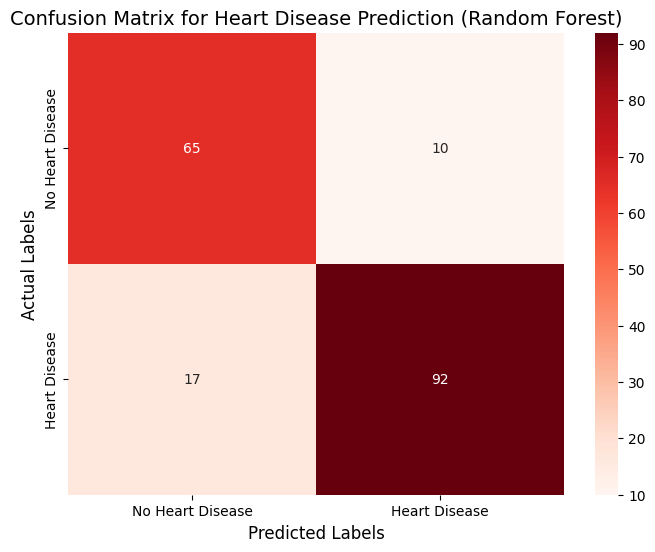

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace `confusion_m` with your actual confusion matrix variable
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Reds", cbar=True,
            xticklabels=["No Heart Disease", "Heart Disease"], 
            yticklabels=["No Heart Disease", "Heart Disease"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.title("Confusion Matrix for Heart Disease Prediction (Random Forest)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [21]:
from sklearn.neighbors import KNeighborsClassifier

Knn=KNeighborsClassifier(n_neighbors=12)
Knn.fit(x_train, y_train)
pred_3=Knn.predict(x_test)

accuracy=accuracy_score(y_test, pred_3)
Accuracy3 = Knn.score(x_test, y_test)
report=classification_report(y_test, pred_3)
confusion_m= confusion_matrix(y_test, pred_3)
print(f"confusion metrix :\n{confusion_m}")
print("Accuracy :",accuracy)
print("Accuracy3 :",Accuracy3)
print("Classification Report :",report)

confusion metrix :
[[68  7]
 [21 88]]
Accuracy : 0.8478260869565217
Accuracy3 : 0.8478260869565217
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.91      0.83        75
           1       0.93      0.81      0.86       109

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [22]:
f1=f1_score(y_test, pred_3)
precision=precision_score(y_test, pred_3)
racall=recall_score(y_test, pred_3)
meanae=mean_absolute_error(y_test, pred_3)
meanse=mean_squared_error(y_test, pred_3)

print(f"accuracy :{accuracy}")
print(f"F1_score :{f1}")
print(f"precision :{precision}")
print(f"racall :{racall}")
print(f"mean_absolute_error :{meanae}")
print(f"mean_squared_error :{meanse}")

accuracy :0.8478260869565217
F1_score :0.8627450980392157
precision :0.9263157894736842
racall :0.8073394495412844
mean_absolute_error :0.15217391304347827
mean_squared_error :0.15217391304347827


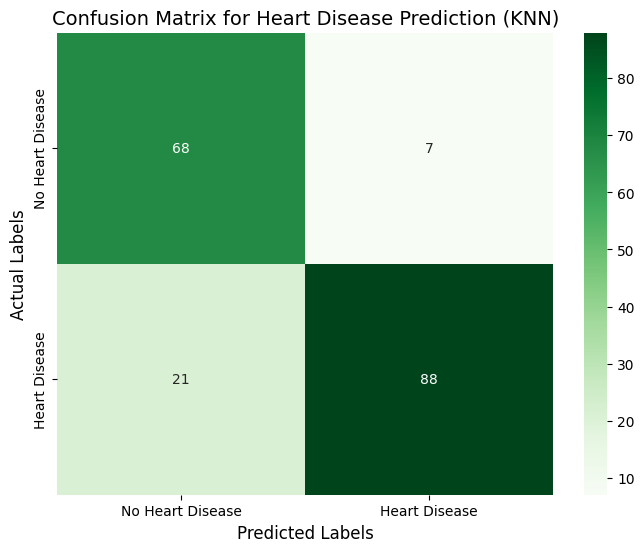

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace `confusion_m` with your actual confusion matrix variable
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Greens", cbar=True,
            xticklabels=["No Heart Disease", "Heart Disease"], 
            yticklabels=["No Heart Disease", "Heart Disease"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.title("Confusion Matrix for Heart Disease Prediction (KNN)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [24]:
from sklearn.linear_model import LinearRegression

LR=KNeighborsClassifier(n_neighbors=5)
LR.fit(x_train, y_train)
y_pred_con=LR.predict(x_test)
pred_4=[1 if pred >= 0.5 else 0 for pred in y_pred_con]
accuracy=accuracy_score(y_test, pred_4)
Accuracy4 = LR.score(x_test, y_test)
report=classification_report(y_test, pred_4)
confusion_m= confusion_matrix(y_test, pred_4)
print(f"confusion metrix :\n{confusion_m}")
print("Accuracy :",accuracy)
print("Accuracy4 :",Accuracy4)
print("Classification Report :",report)

confusion metrix :
[[63 12]
 [19 90]]
Accuracy : 0.8315217391304348
Accuracy4 : 0.8315217391304348
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.84      0.80        75
           1       0.88      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



In [25]:
f1=f1_score(y_test, pred_4)
precision=precision_score(y_test, pred_4)
racall=recall_score(y_test, pred_4)
meanae=mean_absolute_error(y_test, pred_4)
meanse=mean_squared_error(y_test, pred_4)

print(f"accuracy :{accuracy}")
print(f"F1_score :{f1}")
print(f"precision :{precision}")
print(f"racall :{racall}")
print(f"mean_absolute_error :{meanae}")
print(f"mean_squared_error :{meanse}")

accuracy :0.8315217391304348
F1_score :0.8530805687203792
precision :0.8823529411764706
racall :0.8256880733944955
mean_absolute_error :0.16847826086956522
mean_squared_error :0.16847826086956522


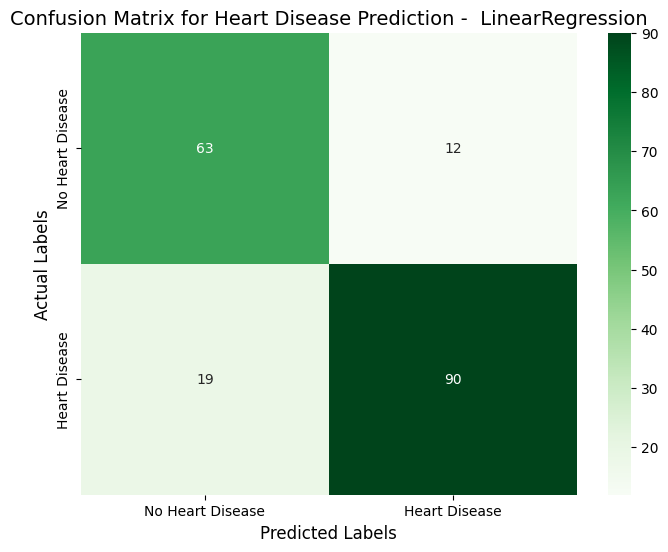

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace `confusion_m` with your actual confusion matrix variable
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Greens", cbar=True,
            xticklabels=["No Heart Disease", "Heart Disease"], 
            yticklabels=["No Heart Disease", "Heart Disease"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.title("Confusion Matrix for Heart Disease Prediction -  LinearRegression", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression

Lgr=KNeighborsClassifier()
Lgr.fit(x_train, y_train)
pred_5=Lgr.predict(x_test)
accuracy=accuracy_score(y_test, pred_5)
Accuracy5 = Lgr.score(x_test, y_test)
report=classification_report(y_test, pred_5)
confusion_m= confusion_matrix(y_test, pred_5)
print(f"confusion metrix :\n{confusion_m}")
print("Accuracy :",accuracy)
print("Accuracy5 :",Accuracy5)
print("Classification Report :",report)

confusion metrix :
[[63 12]
 [19 90]]
Accuracy : 0.8315217391304348
Accuracy5 : 0.8315217391304348
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.84      0.80        75
           1       0.88      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



In [28]:
f1=f1_score(y_test, pred_5)
precision=precision_score(y_test, pred_5)
racall=recall_score(y_test, pred_5)
meanae=mean_absolute_error(y_test, pred_5)
meanse=mean_squared_error(y_test, pred_5)

print(f"accuracy :{accuracy}")
print(f"F1_score :{f1}")
print(f"precision :{precision}")
print(f"racall :{racall}")
print(f"mean_absolute_error :{meanae}")
print(f"mean_squared_error :{meanse}")

accuracy :0.8315217391304348
F1_score :0.8530805687203792
precision :0.8823529411764706
racall :0.8256880733944955
mean_absolute_error :0.16847826086956522
mean_squared_error :0.16847826086956522


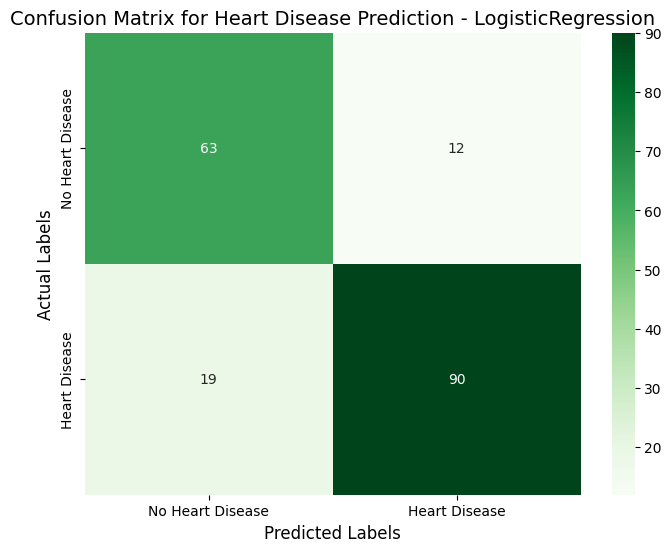

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `confusion_m` is your confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Greens", cbar=True,
            xticklabels=["No Heart Disease", "Heart Disease"], 
            yticklabels=["No Heart Disease", "Heart Disease"])

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.title("Confusion Matrix for Heart Disease Prediction - LogisticRegression", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Accuracy: 84.78%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        75
           1       0.90      0.83      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



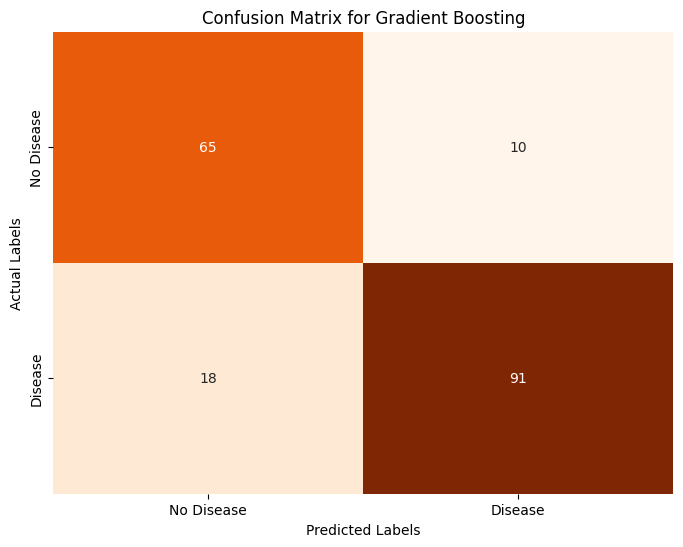

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Learning rate
    max_depth=3,            # Maximum depth of trees
    random_state=42
)

# Train the model
gbc.fit(x_train, y_train)

# Make predictions
y_pred = gbc.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_m = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

Accuracy: 79.89%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75        75
           1       0.83      0.83      0.83       109

    accuracy                           0.80       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184



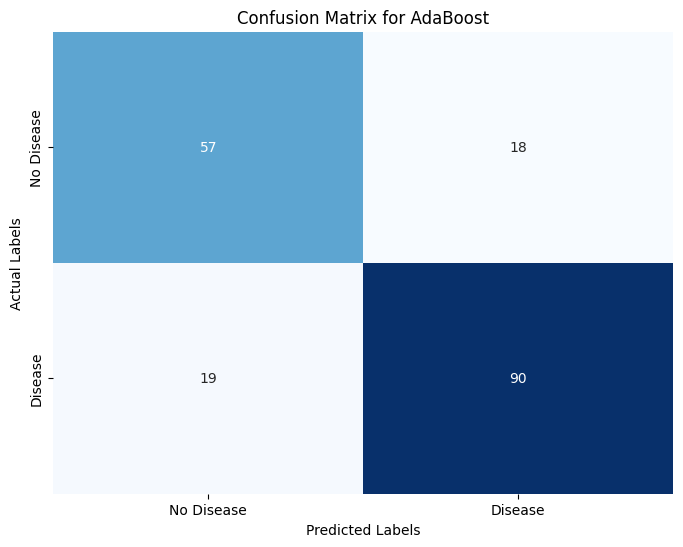

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize AdaBoost Classifier with a Decision Tree as the base estimator
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # Weak learner
    n_estimators=100,       # Number of estimators
    learning_rate=1.0,      # Learning rate
    random_state=42
)

# Train the model
adaboost.fit(x_train, y_train)

# Make predictions
y_pred = adaboost.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_m = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for AdaBoost")
plt.show()


Accuracy: 83.70%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.90      0.82      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



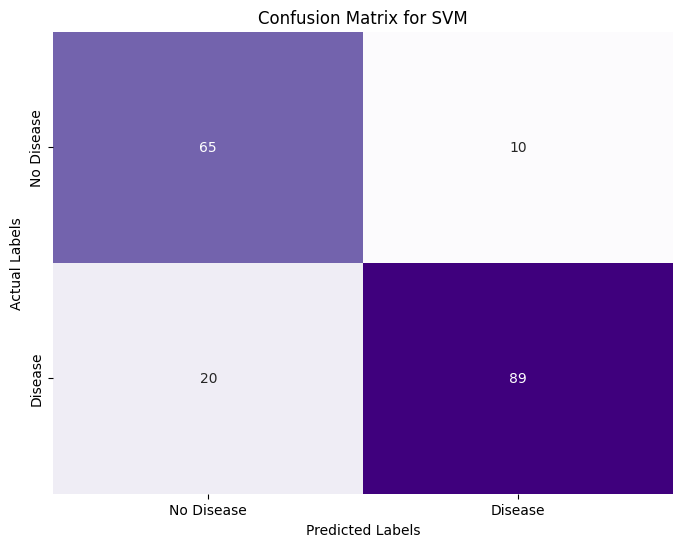

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize and train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(x_train, y_train)

# Make predictions
pred_6 = svm_model.predict(x_test)

# Evaluate the model
accuracy6 = accuracy_score(y_test, pred_6)
confusion_m = confusion_matrix(y_test, pred_6)

print(f"Accuracy: {accuracy6 * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, pred_6))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for SVM")

# meanae=mean_absolute_error(y_test, pred_6)
# meanse=mean_squared_error(y_test, pred_6)
plt.show()


In [33]:
f1=f1_score(y_test, pred_6)
precision=precision_score(y_test, pred_6)
racall=recall_score(y_test, pred_6)
meanae=mean_absolute_error(y_test, pred_6)
meanse=mean_squared_error(y_test, pred_6)

print(f"accuracy :{accuracy6}")
print(f"F1_score :{f1}")
print(f"precision :{precision}")
print(f"racall :{racall}")
print(f"mean_absolute_error :{meanae}")
print(f"mean_squared_error :{meanse}")

accuracy :0.8369565217391305
F1_score :0.8557692307692307
precision :0.898989898989899
racall :0.8165137614678899
mean_absolute_error :0.16304347826086957
mean_squared_error :0.16304347826086957


In [34]:
avg_accuracy = (accuracy6 + Accuracy2 + Accuracy3 + Accuracy4 + Accuracy5) / 5.0

print("Avg Accuracy:",avg_accuracy)

pred_final = (pred_6 + pred_2 + pred_3 + pred_4 + pred_5) / 5.0

Avg Accuracy: 0.8402173913043478


In [35]:
# Making the final model using Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss

# Creating the Voting Classifier with hard voting
final_model = VotingClassifier(estimators=[('svm', svm_model), ('rf', random_forest), ('knn', Knn), ('lr', LR), ('lgr', Lgr)], voting='hard')

# ----------------------------

# Training the final model on the train dataset
final_model.fit(x_train, y_train)

# ----------------------------

# Predicting the output on the test dataset
pred_final = final_model.predict(x_test)

finalAccuracy = final_model.score(x_test, y_test)

print("final accuricy:",finalAccuracy)

final accuricy: 0.8586956521739131


In [36]:
f1=f1_score(y_test, pred_final)
precision=precision_score(y_test, pred_final)
racall=recall_score(y_test, pred_final)
meanae=mean_absolute_error(y_test, pred_final)
meanse=mean_squared_error(y_test, pred_final)
confusion_m= confusion_matrix(y_test, pred_final)

print(f"accuracy :{finalAccuracy}")
print(f"F1_score :{f1}")
print(f"precision :{precision}")
print(f"racall :{racall}")
print(f"mean_absolute_error :{meanae}")
print(f"mean_squared_error :{meanse}")

accuracy :0.8586956521739131
F1_score :0.8750000000000001
precision :0.9191919191919192
racall :0.8348623853211009
mean_absolute_error :0.14130434782608695
mean_squared_error :0.14130434782608695


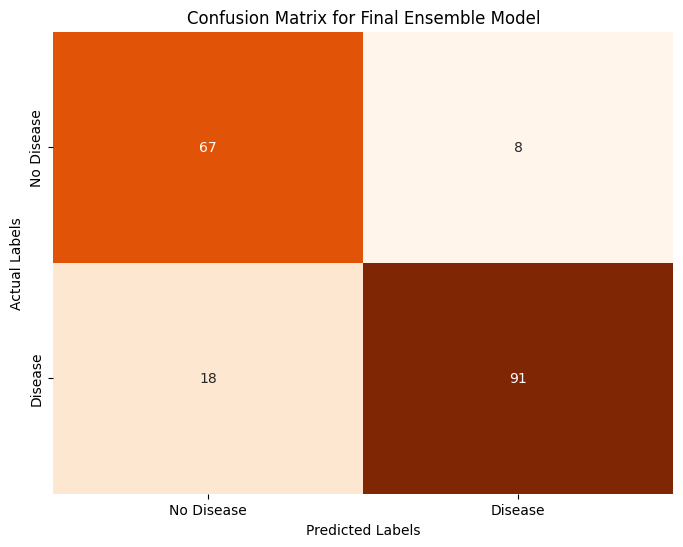

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Final Ensemble Model")
plt.show()